### Libraries

In [61]:
import pandas as pd
import json
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim as ge
stemmer = PorterStemmer()
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# from gensim.models import glove
! pip install glove_python
from glove import Corpus, Glove
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Upload

In [0]:
with open('combine_json.json',encoding="utf8") as file:
  df = pd.DataFrame(json.load(file))

In [0]:
df.head()

,sentiment,text
0,Neutral,"Tesla, Inc (NASDAQ:"
1,Neutral,Company Participants
10,Neutral,Pierre Ferragu - New Street Research
100,Negative,"Well, first of all, obviously on account of te..."
1000,Neutral,Our digital sales grew 42% in the first quarte...


### Data Cleaning

In [63]:
df['text'].apply(lambda x : x.lower()).head()

0                                     tesla, inc (nasdaq:
1                                    company participants
10                   pierre ferragu - new street research
100     well, first of all, obviously on account of te...
1000    our digital sales grew 42% in the first quarte...
Name: text, dtype: object

In [0]:
df['text'] = df['text'].apply(lambda x : re.sub('[^a-zA-z0-9\s]','',x))

In [65]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0                                        Tesla Inc NASDAQ
1                                    Company Participants
10                     Pierre Ferragu New Street Research
100     Well first obviously account tents like I mean...
1000    Our digital sales grew 42 first quarter We als...
Name: text, dtype: object

In [0]:
stem = PorterStemmer()
df['text']= df['text'].apply(lambda x :" ".join([stem.stem(word) for word in x.split()]))

In [0]:
df['text']  = df['text'].apply(lambda x:  re.sub(r'https?:\/\/.*\/\w*', '', x))
df['text']  = df['text'].apply(lambda x :re.sub('[^a-zA-z0-9\s]','' ,x))
df['text']   = df['text'].apply(lambda x: re.sub('@[^\s]+','',x))
df['text']   =df['text'].apply(lambda x:  re.sub(r'\$\w*,', '', x))
df['text']  = df['text'].apply(lambda x: re.sub(r'#\w*', '', x))
df['text']  = df['text'].apply(lambda x: re.sub(r'\s\s+', ' ', x))
df['text']   = df['text'].apply(lambda x: x.lstrip(' '))
df['text']   = df['text'].apply(lambda x: re.sub(r'\d+', '', x))


In [0]:
list_text = df['text'].values.tolist()

In [69]:
list_text[0:10]

['tesla inc nasdaq',
 'compani particip',
 'pierr ferragu new street research',
 'well first obvious account tent like I mean like hardcor tent I like cub scout tent fine actual credit goe tesla team actual look could fremont feel like actual append build space west side build use lot intern space that current use wareh fremont factori and believ actual done minim disrupt add model Y fremont',
 'our digit sale grew  first quarter We also expand coverag area reach  custom first quarter thi mean  custom shop kroger brickandmortar store also shop us pickup deliveri By end year everyon america abil modal shop kroger whether decid come store use pickup deliveri servic ship',
 'our effort posit kroger lead omnichannel retail food industri sinc  weve gone digit sale dollar  annual run rate  billion trend toward  billion digit sale run rate futur I call middl transform import frame magnitud progress made',
 ' anoth pivot year partner custom valu pillar restock kroger We continu improv custom e

In [0]:
with open("listtext.txt", "w") as output:
    output.write(str(list_text))

In [0]:
import ast

with open('listtext.txt', 'r') as f:
    mylist = ast.literal_eval(f.read())

In [0]:
# mylist

### BOW Model 

In [0]:
vectorizer = CountVectorizer()
# tokenize and build vocab
fit = vectorizer.fit_transform(list_text)

In [0]:
fit.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
Y = pd.get_dummies(df['sentiment']).values
Y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [0]:
fit.shape

(1232, 2990)

In [0]:
Y.shape

(1232, 3)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
...    fit, Y, test_size=0.2, random_state=1000)

In [0]:
y_train


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [0]:
input_dim = x_train.shape[1]  # Number of features
input_dim

2803

In [0]:
# y_train.shape

In [97]:


input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(rate = 0.6))

model.add(layers.Dense(64,activation = 'relu'))
model.add(Dropout(rate = 0.5))

# model.add(layers.Dense(32,activation = 'relu'))
# model.add(Dropout(rate = 0.5))

model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy'])
model.summary()

W0718 09:17:33.411800 140571791062912 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               128128    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 195       
Total params: 136,579
Trainable params: 136,579
Non-trainable params: 0
_________________________________________________________________


In [74]:
x_train.shape

(985, 1000)

In [75]:
y_train.shape

(985, 3)

In [98]:
history = model.fit(x_train, y_train,
                     epochs=10,
                     verbose=2,
                     validation_data=(x_test, y_test),
                     batch_size=10)

Train on 985 samples, validate on 247 samples
Epoch 1/10
 - 4s - loss: 5.8232 - acc: 0.5990 - val_loss: 4.9249 - val_acc: 0.6815
Epoch 2/10
 - 1s - loss: 4.3667 - acc: 0.7151 - val_loss: 4.1464 - val_acc: 0.7247
Epoch 3/10
 - 1s - loss: 4.1018 - acc: 0.7310 - val_loss: 3.3382 - val_acc: 0.7868
Epoch 4/10
 - 1s - loss: 3.9039 - acc: 0.7509 - val_loss: 3.5185 - val_acc: 0.7760
Epoch 5/10
 - 1s - loss: 3.7888 - acc: 0.7550 - val_loss: 2.9338 - val_acc: 0.8057
Epoch 6/10
 - 1s - loss: 3.6039 - acc: 0.7682 - val_loss: 3.0011 - val_acc: 0.8057
Epoch 7/10
 - 1s - loss: 3.5362 - acc: 0.7733 - val_loss: 3.0786 - val_acc: 0.8003
Epoch 8/10
 - 1s - loss: 4.0415 - acc: 0.7421 - val_loss: 4.6499 - val_acc: 0.7058
Epoch 9/10
 - 1s - loss: 4.2212 - acc: 0.7320 - val_loss: 3.9542 - val_acc: 0.7436
Epoch 10/10
 - 1s - loss: 4.4396 - acc: 0.7191 - val_loss: 4.9556 - val_acc: 0.6869


Test Loss:  4.955615188428747
Test Accuracy 0.6869096005493812
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


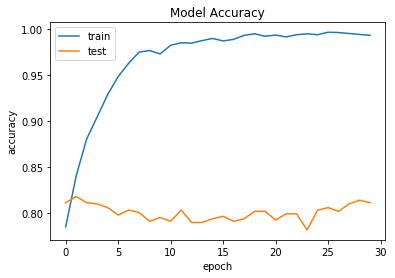

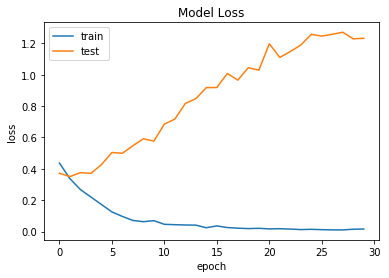

In [101]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])

# print('Train Loss: ', score[])
# print('Train Accuracy', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Confusion Matrix

In [82]:
y_pred = history.model.predict(x_test)
y_pred.shape

(247, 3)

In [0]:
pred = y_pred.argmax(axis =1)
test = y_test.argmax(axis=1)

In [0]:
cm = confusion_matrix(test, pred) 

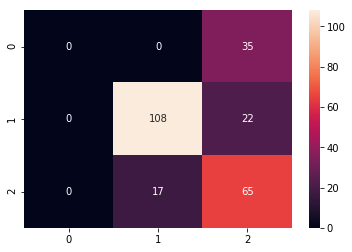

In [85]:
sns.heatmap(cm, annot=True, fmt="d")

### Word Embedding (Glove)

In [86]:
review_words = list()
for text in list_text:
    tokens = word_tokenize(text)
    review_words.append(tokens)
len(review_words)

1232

In [0]:
# list_text[7]

In [0]:
# review_words[1:7]

In [89]:
token = Tokenizer()
token.fit_on_texts(review_words)
seq = token.texts_to_sequences(review_words)
pad = pad_sequences(seq , maxlen = 1000)
word_idx = token.word_index
features = pad
# len(word_idx)
vocab_size = len(token.word_index) + 1  # Adding 1 because of reserved 0 index

print("token",token)
print("text to seq",seq)
print("features",features)
print("features",features.shape)

print("vocab_size",vocab_size)
print("review_words",review_words)

token <keras_preprocessing.text.Tokenizer object at 0x7fd921108f60>
text to seq [[148, 532, 1052], [21, 329], [751, 752, 49, 1244, 814], [17, 18, 169, 393, 1053, 14, 1, 87, 14, 1889, 1053, 1, 14, 1890, 1891, 1053, 1484, 99, 208, 815, 148, 160, 99, 28, 102, 753, 222, 14, 99, 1892, 90, 419, 1485, 250, 90, 58, 39, 317, 419, 24, 364, 58, 1486, 753, 1245, 2, 198, 99, 533, 1054, 919, 149, 40, 442, 753], [77, 297, 97, 675, 18, 5, 12, 29, 394, 754, 234, 473, 36, 18, 5, 103, 87, 36, 342, 83, 1893, 150, 29, 342, 10, 676, 140, 1487, 65, 6, 343, 235, 284, 1488, 342, 83, 365, 755, 34, 150, 58, 676, 140, 108, 199], [77, 677, 182, 83, 420, 1489, 395, 236, 263, 443, 45, 920, 297, 97, 756, 816, 330, 100, 89, 264, 421, 89, 297, 97, 330, 100, 251, 1, 56, 534, 614, 80, 678, 1894, 223, 200], [298, 1246, 6, 265, 36, 161, 1895, 366, 83, 12, 15, 92, 36, 127, 150, 318, 297, 1896, 265, 263, 535, 536, 1055, 1897, 1056, 1247, 615, 265, 224, 284, 237, 36, 209, 1057, 1058], [1898, 265, 104, 1490, 1899, 1900, 537, 5

In [0]:
len(word_idx)

2815

In [0]:
pad.shape

(1232, 1000)

In [43]:
Y.shape

(1232, 3)

In [0]:
# word_index

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1000)

In [0]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
#             print(word)
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:
import numpy as np
embedding_dim = 50
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt',token.word_index, embedding_dim)

In [93]:
embedding_matrix.shape

(2816, 50)

In [0]:
x_train.shape

(985, 1000)

In [0]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [0]:
x_test.shape

(247, 1000)

In [0]:
y_test.shape

(247, 3)

In [102]:
embedding_dim = 50

glovemodel = Sequential()

glovemodel.add(layers.Embedding(vocab_size, 
                           embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=1000, 
                           trainable=True))

glovemodel.add(layers.Flatten())

glovemodel.add(layers.Dense(32, activation='relu'))
glovemodel.add(Dropout(rate = 0.5))

glovemodel.add(layers.Dense(16, activation='relu'))
glovemodel.add(Dropout(rate = 0.4))

glovemodel.add(layers.Dense(3, activation='softmax'))

glovemodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

glovemodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1000, 50)          140800    
_________________________________________________________________
flatten_5 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1600032   
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 51        
Total para

In [103]:
history = glovemodel.fit(x_train, y_train,
                    epochs=30,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = glovemodel.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = glovemodel.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Train on 985 samples, validate on 247 samples
Epoch 1/30
 - 10s - loss: 0.5129 - acc: 0.7489 - val_loss: 0.4006 - val_acc: 0.7976
Epoch 2/30
 - 6s - loss: 0.4308 - acc: 0.7946 - val_loss: 0.3627 - val_acc: 0.8030
Epoch 3/30
 - 6s - loss: 0.4048 - acc: 0.8054 - val_loss: 0.3686 - val_acc: 0.7962
Epoch 4/30
 - 6s - loss: 0.3745 - acc: 0.8203 - val_loss: 0.3446 - val_acc: 0.8192
Epoch 5/30
 - 6s - loss: 0.3345 - acc: 0.8308 - val_loss: 0.3440 - val_acc: 0.8138
Epoch 6/30
 - 6s - loss: 0.3235 - acc: 0.8528 - val_loss: 0.3632 - val_acc: 0.8273
Epoch 7/30
 - 6s - loss: 0.3014 - acc: 0.8525 - val_loss: 0.3663 - val_acc: 0.8043
Epoch 8/30
 - 6s - loss: 0.2677 - acc: 0.8721 - val_loss: 0.3488 - val_acc: 0.8300
Epoch 9/30
 - 6s - loss: 0.2634 - acc: 0.8846 - val_loss: 0.3773 - val_acc: 0.8259
Epoch 10/30
 - 6s - loss: 0.2366 - acc: 0.8897 - val_loss: 0.3720 - val_acc: 0.8178
Epoch 11/30
 - 6s - loss: 0.2203 - acc: 0.8978 - val_loss: 0.4235 - val_acc: 0.8165
Epoch 12/30
 - 6s - loss: 0.2019 - acc

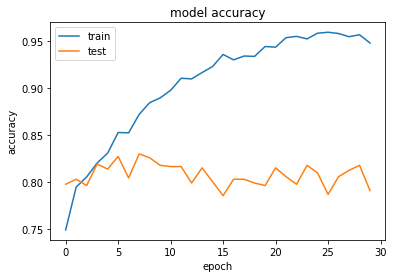

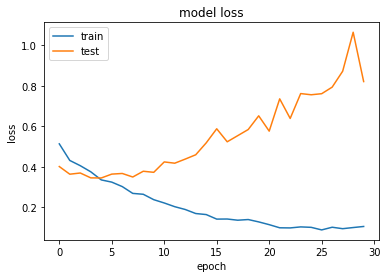

In [104]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Confusion Matrix

In [0]:
y_pred_glove = history.model.predict(x_test)
y_pred.shape
pred_glove = y_pred_glove.argmax(axis =1)
test_glove = y_test.argmax(axis=1)
cm_glove = confusion_matrix(test_glove, pred_glove) 
sns.heatmap(cm_glove, annot=True, fmt="d")

### 3.RNN

In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

rnnmodel = Sequential()
rnnmodel.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=1000, 
                           trainable=True))

# rnnmodel.add(Dropout(0.5))

# Recurrent layer
rnnmodel.add(LSTM(64, return_sequences=False, 
               dropout=0.4, recurrent_dropout=0.1))

rnnmodel.add(Dropout(0.5))
# Recurrent layer
# rnnmodel.add(LSTM(32, return_sequences=False, 
#                dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
rnnmodel.add(Dense(32, activation='relu'))

# Dropout for regularization
rnnmodel.add(Dropout(0.5))


# Output layer
rnnmodel.add(Dense(3, activation='softmax'))

# Compile the model

rnnmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
rnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 50)          140800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 172,419
Trainable params: 172,419
Non-trainable params: 0
_________________________________________________________________


In [0]:
rnnhistory = rnnmodel.fit(x_train,  y_train, 
                    batch_size=10, epochs=10,
                    validation_data=(x_test, y_test))

Train on 985 samples, validate on 247 samples
Epoch 1/10
985/985 [==============================] - 74s 75ms/step - loss: 0.5145 - acc: 0.7408 - val_loss: 0.3822 - val_acc: 0.7949
Epoch 2/10
985/985 [==============================] - 73s 74ms/step - loss: 0.4072 - acc: 0.8010 - val_loss: 0.3724 - val_acc: 0.8084
Epoch 3/10
985/985 [==============================] - 73s 74ms/step - loss: 0.3995 - acc: 0.7898 - val_loss: 0.3494 - val_acc: 0.8070
Epoch 4/10
985/985 [==============================] - 73s 74ms/step - loss: 0.3791 - acc: 0.8074 - val_loss: 0.3680 - val_acc: 0.8124
Epoch 5/10
985/985 [==============================] - 73s 74ms/step - loss: 0.3639 - acc: 0.8112 - val_loss: 0.3441 - val_acc: 0.8246
Epoch 6/10
985/985 [==============================] - 73s 74ms/step - loss: 0.3601 - acc: 0.8183 - val_loss: 0.3619 - val_acc: 0.8124
Epoch 7/10
985/985 [==============================] - 72s 73ms/step - loss: 0.3509 - acc: 0.8234 - val_loss: 0.3440 - val_acc: 0.8219
Epoch 8/10
985/9

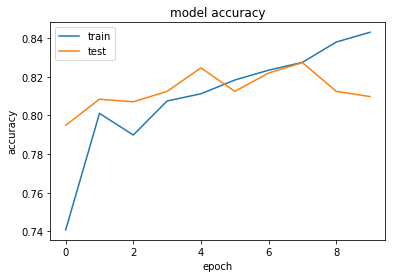

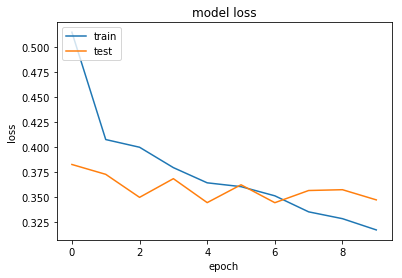

In [0]:
# summarize history for accuracy
plt.plot(rnnhistory.history['acc'])
plt.plot(rnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(rnnhistory.history['loss'])
plt.plot(rnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Confusion Matrix

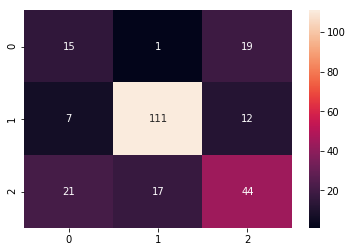

In [105]:
y_pred_rnn = history.model.predict(x_test)
y_pred_rnn.shape
pred_rnn = y_pred_rnn.argmax(axis =1)
test_rnn = y_test.argmax(axis=1)
cm_rnn = confusion_matrix(test_rnn, pred_rnn) 
sns.heatmap(cm_rnn, annot=True, fmt="d")